In [93]:
import matplotlib
%matplotlib widget
import seaborn as sns
import matplotlib.pyplot as plt
#import ipympl

In [94]:
import agent_based_model as abm 
import importlib
importlib.reload(abm)


<module 'agent_based_model' from '/Users/owls/Documents/projects/fake-banking-data/agent_based_model.py'>

In [123]:
sns.reset_defaults()
#sns.set_context('notebook')
sns.set_theme(palette='viridis')
sns.set_context('talk')
sns.set_style('whitegrid')

Completed: 96 steps
Run time: 0:00:00.639876
Simulation finished
sanity check, agent 0s txns    timestep txn_type  sender_id sender_type  receiver_id receiver_type  \
0        41  receive        827      normal            1        normal   
1        49  receive        986      normal            1        normal   
2        58     send          1      normal         1005    suspicious   
3        59     send          1      normal          812        normal   

        amount  acct_balance  
0  5294.375699   5394.375699  
1  4873.366643  10267.742343  
2 -6000.527521   4267.214821  
3 -4936.113824   -668.899003  
viz data
done


/Users/owls/Documents/projects/fake-banking-data/agent_based_model.py:342: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))


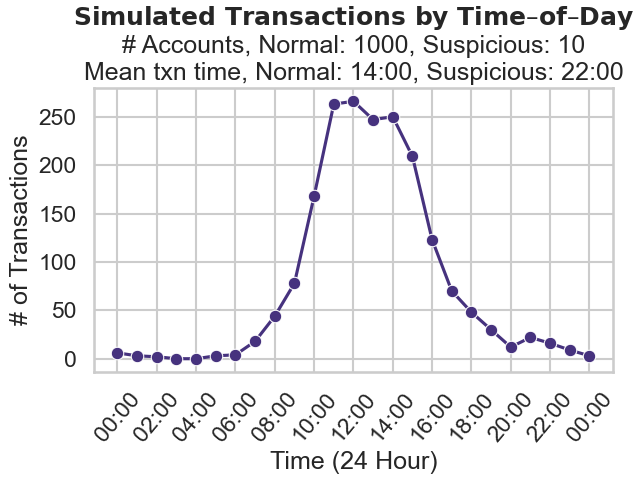

In [125]:
fig, model, results = abm.run_exp(viz=True)
plt.tight_layout()
plt.show()